In [3]:
from astropy.io import fits
from astropy import table
import numpy as np
from mceh_ver1 import find_luminosity as fl
from mceh_ver1 import fitting
from copy import deepcopy
import astropy.units as u
import astropy.cosmology.units as cu
import astropy.coordinates as coordinates
from matplotlib import pyplot as plt

Call manual() to get the manual.


In [4]:
efeds = table.QTable.read('data/eFEDS_clusters_V3.2.fits')
efeds_ctp = table.QTable.read('data/eFEDS_c001_main_ctp_clus_v2.1.fits')
masstable = table.QTable.read('data/eFEDSmasstable.fits')

In [5]:
rd = fits.getdata('data/random_scienceFlag.fits', ext = -1)

Input data

In [4]:
new_efeds = table.QTable()
new_efeds['ID'] = efeds['ID']
new_efeds['ID_SRC'] = efeds['ID_SRC']
new_efeds['RA'] = efeds['RA'].value * u.degree
new_efeds['DEC'] = efeds['DEC'].value * u.degree
new_efeds['z'] = efeds['z']

In [5]:
ctp_index_to_main = [np.where(efeds_ctp['ID_SRC'] == efeds['ID_SRC'][i])[0][0] for i in range(len(efeds))]
print(ctp_index_to_main)

[541, 463, 230, 198, 379, 511, 358, 185, 429, 273, 423, 461, 133, 180, 211, 260, 130, 174, 354, 394, 451, 518, 335, 140, 309, 128, 333, 145, 204, 312, 221, 60, 155, 489, 386, 220, 432, 186, 68, 153, 486, 285, 9, 523, 452, 226, 252, 310, 124, 217, 257, 532, 455, 148, 1, 302, 303, 187, 385, 357, 374, 94, 295, 159, 41, 355, 255, 366, 514, 484, 450, 177, 517, 339, 20, 141, 364, 138, 349, 157, 350, 234, 129, 444, 119, 267, 308, 259, 276, 13, 288, 382, 365, 362, 293, 100, 207, 280, 378, 427, 411, 323, 271, 361, 86, 212, 390, 527, 136, 147, 178, 319, 298, 340, 160, 376, 158, 240, 139, 236, 338, 126, 205, 460, 161, 422, 492, 534, 531, 163, 95, 168, 238, 471, 278, 92, 213, 228, 84, 6, 56, 114, 175, 287, 537, 424, 249, 538, 502, 146, 435, 304, 327, 459, 179, 430, 453, 242, 227, 225, 123, 58, 443, 371, 425, 508, 540, 117, 392, 261, 317, 396, 55, 299, 398, 169, 112, 462, 353, 530, 46, 216, 351, 324, 18, 127, 232, 262, 286, 69, 325, 409, 292, 395, 412, 74, 64, 176, 380, 17, 258, 368, 110, 137, 332,

In [6]:
(efeds_ctp['Name'] == masstable['Name']).all()

True

In [7]:
(new_efeds['ID_SRC'] == efeds_ctp['ID_SRC'][ctp_index_to_main]).all()

True

In [8]:
masstable['median_500c_lcdm'].unit

UnrecognizedUnit(Msun/h)

In [9]:
new_efeds['median_500c_lcdm'] = masstable['median_500c_lcdm'][ctp_index_to_main].value * u.M_sun / cu.littleh
new_efeds['r500c_lcdm'] = masstable['r500c_lcdm']

Determine the no-masked area

In [33]:
efeds_coord = coordinates.SkyCoord(new_efeds['RA'], new_efeds['DEC'])
rd_coord = coordinates.SkyCoord(rd['RA'] * u.degree, rd['DEC'] * u.degree)

In [59]:
clean_rd_coord = efeds_coord.search_around_sky(rd_coord, max(new_efeds['r500c_lcdm']) * 1.5)

In [67]:
clean_rd_coord[0]

array([      83,       83,       84, ..., 45483137, 45483139, 45483140])

In [69]:
clean_rd = rd[np.unique(clean_rd_coord[0])]
clean_rd_coord = coordinates.SkyCoord(clean_rd['RA'] * u.deg, clean_rd['DEC'] * u.deg)

In [72]:

index = []
for i in range(len(new_efeds)):
    this_efeds_coord = coordinates.SkyCoord(new_efeds['RA'][i], new_efeds['DEC'][i])
    index.append(np.where(this_efeds_coord.separation(clean_rd_coord) <= new_efeds['r500c_lcdm'][i])[0])
    print(f'finsih {i+1}/{len(new_efeds)}')

finsih 1/542
finsih 2/542
finsih 3/542
finsih 4/542
finsih 5/542
finsih 6/542
finsih 7/542
finsih 8/542
finsih 9/542
finsih 10/542
finsih 11/542
finsih 12/542
finsih 13/542
finsih 14/542
finsih 15/542
finsih 16/542
finsih 17/542
finsih 18/542
finsih 19/542
finsih 20/542
finsih 21/542
finsih 22/542
finsih 23/542
finsih 24/542
finsih 25/542
finsih 26/542
finsih 27/542
finsih 28/542
finsih 29/542
finsih 30/542
finsih 31/542
finsih 32/542
finsih 33/542
finsih 34/542
finsih 35/542
finsih 36/542
finsih 37/542
finsih 38/542
finsih 39/542
finsih 40/542
finsih 41/542
finsih 42/542
finsih 43/542
finsih 44/542
finsih 45/542
finsih 46/542
finsih 47/542
finsih 48/542
finsih 49/542
finsih 50/542
finsih 51/542
finsih 52/542
finsih 53/542
finsih 54/542
finsih 55/542
finsih 56/542
finsih 57/542
finsih 58/542
finsih 59/542
finsih 60/542
finsih 61/542
finsih 62/542
finsih 63/542
finsih 64/542
finsih 65/542
finsih 66/542
finsih 67/542
finsih 68/542
finsih 69/542
finsih 70/542
finsih 71/542
finsih 72/542
f

In [73]:
# check
for i in range(len(index)):
    if len(index[i]) != 0 :
        print(i)
        break

19


In [75]:
print(new_efeds[19]['RA'], new_efeds[19]['DEC'], new_efeds[19]['r500c_lcdm'].to(u.deg))

128.16171250777919 deg -0.5335537807590048 deg 0.07117582309464207 deg


<Quantity 0.35240723 deg>

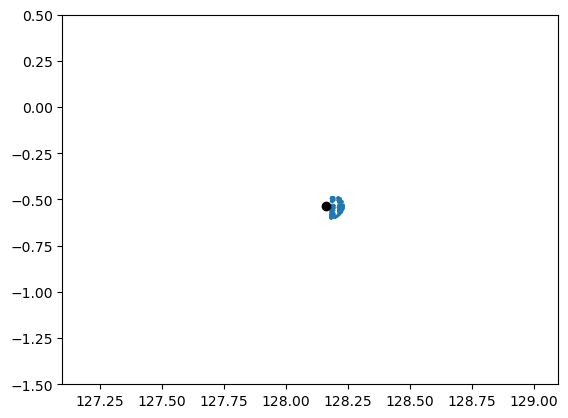

In [78]:
plt.xlim(127.1, 129.1)
plt.ylim(-1.5, 0.5)
plt.scatter(clean_rd['ra'][index[19]], clean_rd['dec'][index[19]], s = 0.2)
plt.scatter(new_efeds[19]['RA'].value, new_efeds[19]['DEC'].value, color = 'black')
max(new_efeds['r500c_lcdm'].to(u.deg))

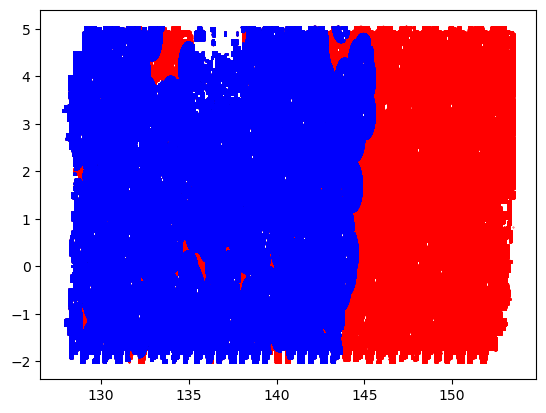

In [80]:
plt.scatter(rd['ra'], rd['dec'], s = 0.1, color = 'red')
plt.scatter(clean_rd['ra'], clean_rd['dec'], s = 0.1, color = 'blue')

In [85]:
no_masked_area_num = np.array([len(index[i]) for i in range(len(index))])
no_masked_area = np.array(no_masked_area_num / 100) * u.arcmin ** 2
new_efeds['no_masked_area'] = no_masked_area

In [88]:
new_efeds['area'] = new_efeds['r500c_lcdm'] ** 2 * np.pi
new_efeds.write('data/modified_efeds.fits')

In [6]:
new_efeds = table.QTable.read('data/modified_efeds.fits')

In [5]:
print(max(new_efeds['no_masked_area']), min(new_efeds['no_masked_area']))

361.44 arcmin2 0.0 arcmin2


In [54]:
old_efeds = fits.getdata('data/efeds_r_sr_z01_m_cmag_obs_area_icmag[16,22].fits')
max(old_efeds['area'])

361.44

In [42]:
nomask_area = deepcopy(new_efeds['no_masked_area'])
new_efeds.remove_column('no_masked_area')
new_efeds['nomask_area'] = nomask_area

In [43]:
new_efeds.colnames

['ID',
 'ID_SRC',
 'RA',
 'DEC',
 'z',
 'median_500c_lcdm',
 'r500c_lcdm',
 'area',
 'nomask_area']

In [44]:
coverage30 = (new_efeds['nomask_area'] / new_efeds['area']) >= 0.3

In [45]:
len(np.where(coverage30)[0])

436

In [15]:
z_greater_than_0p1 = new_efeds['z'] >= 0.1

In [47]:
len(np.where(coverage30 & z_greater_than_0p1)[0])

416

In [12]:
len(old_efeds)

401

In [48]:
new_efeds['coverage30'] = coverage30
new_efeds['z_greater_than_0p1'] = z_greater_than_0p1

In [52]:
new_efeds['science_ready'] = coverage30 & z_greater_than_0p1

In [53]:
new_efeds.write('data/modified_efeds.fits', overwrite = True)

In [1]:
from rsmodel import outputModels as model

In [7]:
i_cmag = [model.printRSmodel(
    '/home/hylin/workspace/data/bc03_rs_zfp3d0_tau_p0d4.fits',
    ['hsc_i'],
    new_efeds['z'][i]
    )[1]['hsc_i'][4] for i in range(len(new_efeds))]

In [9]:
new_efeds['i_cmag'] = i_cmag

In [12]:
new_efeds['i_cmag_between_16_22'] = (new_efeds['i_cmag'] >= 16) & (new_efeds['i_cmag'] <= 22)

In [14]:
len(np.where(new_efeds['science_ready'] & new_efeds['i_cmag_between_16_22'])[0])

391

In [17]:
coverage20 = (new_efeds['nomask_area'] / new_efeds['area']) >= 0.2

In [18]:
len(np.where(coverage20 & z_greater_than_0p1 & new_efeds['i_cmag_between_16_22'])[0])

401

In [20]:
new_efeds.remove_column('coverage30')

In [21]:
new_efeds['coverage20'] = coverage20
new_efeds['science_ready'] = coverage20 & z_greater_than_0p1 & new_efeds['i_cmag_between_16_22']

In [22]:
len(np.where(new_efeds['science_ready'])[0])

401

In [23]:
new_efeds.write('data/modified_efeds_v1.fits')

In [25]:
hsc = fits.getdata('data/hsc_scienceFlag_i24_isgalaxy_zbound.fits', ext = -1)
# This hsc has been chosed that 1. science_flag == True 
#                               2. imag_cmodel > 24
#                               3. iclassification_extendedness == 1

In [27]:
zbound_file = fits.getdata('data/zbound.fits', ext = -1)
print(len(hsc), len(zbound_file))

10139579 10139579


In [28]:
(zbound_file['object_id'] == hsc['object_id']).all()

True

In [32]:
hsc_coord = coordinates.SkyCoord(hsc['ra'] * u.deg, hsc['dec'] * u.deg)

In [34]:
clean_hsc = hsc_coord.search_around_sky(efeds_coord, max(new_efeds['r500c_lcdm'] * 1.2))

In [37]:
alllf_raw = []
bins=np.linspace(14,24,41)
for i in range(len(new_efeds)):
    this_coord = coordinates.SkyCoord(new_efeds['RA'][i], new_efeds['DEC'][i])
    i_ignore_zbound = np.where(this_coord.separation(hsc_coord) <= new_efeds['r500c_lcdm'][i])[0]
    this_hsc = hsc[i_ignore_zbound]
    
    # apply zbound
    this_hsc = hsc[np.where((this_hsc['zbound'][:,0] <= new_efeds['z'][i]) & (this_hsc['zbound'][:,1] >= new_efeds['z'][i]))[0]]
    alllf_raw.append(np.histogram(this_hsc['imag_cmodel'], bins)[0])
    print(f'finish {i+1}/{len(new_efeds)}')


finish 1/542
finish 2/542
finish 3/542
finish 4/542
finish 5/542
finish 6/542
finish 7/542
finish 8/542
finish 9/542
finish 10/542
finish 11/542
finish 12/542
finish 13/542
finish 14/542
finish 15/542
finish 16/542
finish 17/542
finish 18/542
finish 19/542
finish 20/542
finish 21/542
finish 22/542
finish 23/542
finish 24/542
finish 25/542
finish 26/542
finish 27/542
finish 28/542
finish 29/542
finish 30/542
finish 31/542
finish 32/542
finish 33/542
finish 34/542
finish 35/542
finish 36/542
finish 37/542
finish 38/542
finish 39/542
finish 40/542
finish 41/542
finish 42/542
finish 43/542
finish 44/542
finish 45/542
finish 46/542
finish 47/542
finish 48/542
finish 49/542
finish 50/542
finish 51/542
finish 52/542
finish 53/542
finish 54/542
finish 55/542
finish 56/542
finish 57/542
finish 58/542
finish 59/542
finish 60/542
finish 61/542
finish 62/542
finish 63/542
finish 64/542
finish 65/542
finish 66/542
finish 67/542
finish 68/542
finish 69/542
finish 70/542
finish 71/542
finish 72/542
f

In [39]:
np.where(new_efeds['science_ready'])[0][:10]

array([21, 24, 27, 28, 29, 30, 31, 32, 34, 37])

In [46]:
np.shape(alllf_raw)

(542, 40)

In [47]:
new_efeds['bins'] = np.array([bins for i in new_efeds])
new_efeds['i_obs_alllf_raw'] = np.array(alllf_raw)
new_efeds['i_obs_alllf_corrected'] = [np.array(alllf_raw)[i] / new_efeds['nomask_area'][i] * new_efeds['area'][i] for i in range(len(new_efeds))]

/home/hylin/.conda/envs/env1/lib/python3.9/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [55]:
np.where(old_efeds['ID_SRC'] == new_efeds['ID_SRC'][21])[0]

array([0])

In [63]:
print(old_efeds['obs'][0])
print(new_efeds['i_obs_alllf_corrected'][21])
# It's kind of wried that they are different. May caused by the difference between `angular_separation` and `Skycoord.separation`

[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           1.40877915
   0.           0.           0.           0.           0.
   1.40877915   1.40877915   0.           2.8175583    5.6351166
  11.2702332    5.6351166   12.67901235  16.9053498   16.9053498
  15.49657065  42.26337451  73.25651582  64.80384092  71.84773667
  88.75308648 128.19890269 132.42524014 162.0096023  171.87105635]
[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           1.40877915   1.40877915   0.           0.
   0.           1.40877915   2.8175583    4.22633745   2.8175583
   4.22633745   5.6351166    7.04389575  12.67901235   8.4526749
   7.04389575  21.13168726  25.35802471  21.13168726  26.76680386
  38.03703706  52.12482856  40.85459536  42.26337451  69.03017837
  67.62139922 104.24965713 105.65843628 166.23593975 187.3676

In [73]:
# Let's check it.
i_new = 21
i_old = 0
pos = [new_efeds[i_new]['RA'].value, new_efeds[i_new]['DEC'].value]
ang_sep = fl.quantity_function('imag_cmodel', pos, hsc, new_efeds['r500c_lcdm'][i_new].to(u.deg).value, bins)[0]

this_coord = coordinates.SkyCoord(pos[0] * u.deg, pos[1] * u.deg)
close_index = np.where(this_coord.separation(hsc_coord) <= new_efeds[i_new]['r500c_lcdm'])[0]
sep = np.histogram(hsc[close_index]['imag_cmodel'], bins)[0]
print('ang_sep =', ang_sep)
print('sep =', sep)
# What? Why?

ang_sep = [  0   0   0   0   0   0   0   0   1   1   1   0   0   0   1   1   2   6
   2   1   9   3   5  10  14  14  10  18  26  25  30  45  68  57  80  82
 116 122 151 158]
sep = [  0   0   0   0   0   0   0   0   1   1   1   0   0   0   1   1   2   6
   2   1   9   3   5  10  14  14  10  18  26  25  30  45  68  57  80  82
 116 122 151 158]


In [74]:
new_efeds.write('data/modified_efeds_ver1.fits')